8) Para o arquivo Biscobis.xlsx, referente a uma amostra de 100 empresas clientes de uma
grande empresa que é fornecedora no setor industrial , processe a análise de regressão
múltipla stepwise e analise os resultados obtidos, sendo:
Variável dependente: X9 = nível de uso do serviço (quanto do total de produtos da empresa
é comprado da Biscobis)

Variáveis independentes: avaliação de 0 a 10 de atributos da Biscobis:

X1 = rapidez na entrega do produto

X2 = nível de preço

X3 = flexibilidade de preço

X4 = imagem do fornecedor

X5 = serviço como um todo

X6 = imagem da força de vendas

X7 = qualidade do produto

X8 = Variável nominal – status da compra 1=primeira compra 2=segunda compra

3=comprador frequente

In [12]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [13]:
Caminho = '/Users/fabicampanari/Desktop/1_Exam-Linear Regression/Biscobis.xlsx'
df = pd.read_excel(Caminho)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,4.1,0.6,6.9,4.7,2.4,2.3,5.2,1,32
1,6.0,0.9,9.6,7.8,3.4,4.6,4.5,3,58
2,4.6,2.4,9.5,6.6,3.5,4.5,7.6,1,46
3,5.5,1.6,9.4,4.7,3.5,3.0,7.6,3,63
4,2.4,1.6,8.8,4.8,2.0,2.8,5.8,1,32


In [14]:

# Análise descritiva
# Estatísticas descritivas
print("Estatísticas Descritivas:\n", df.describe())



Estatísticas Descritivas:
                x1          x2          x3          x4          x5          x6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     3.515000    2.364000    7.894000    5.258000    2.913000    2.665000   
std      1.320726    1.195659    1.386502    1.130047    0.750307    0.770855   
min      0.000000    0.200000    5.000000    2.500000    0.700000    1.100000   
25%      2.500000    1.475000    6.700000    4.575000    2.400000    2.200000   
50%      3.400000    2.150000    8.050000    5.000000    3.000000    2.600000   
75%      4.600000    3.225000    9.100000    6.000000    3.425000    3.000000   
max      6.100000    5.400000   10.000000    8.200000    4.600000    4.600000   

               x7          x8         x9  
count  100.000000  100.000000  100.00000  
mean     6.957000    2.000000   46.10000  
std      1.590645    0.828775    8.98877  
min      3.700000    1.000000   25.00000  
25%      5.800000    1.00000

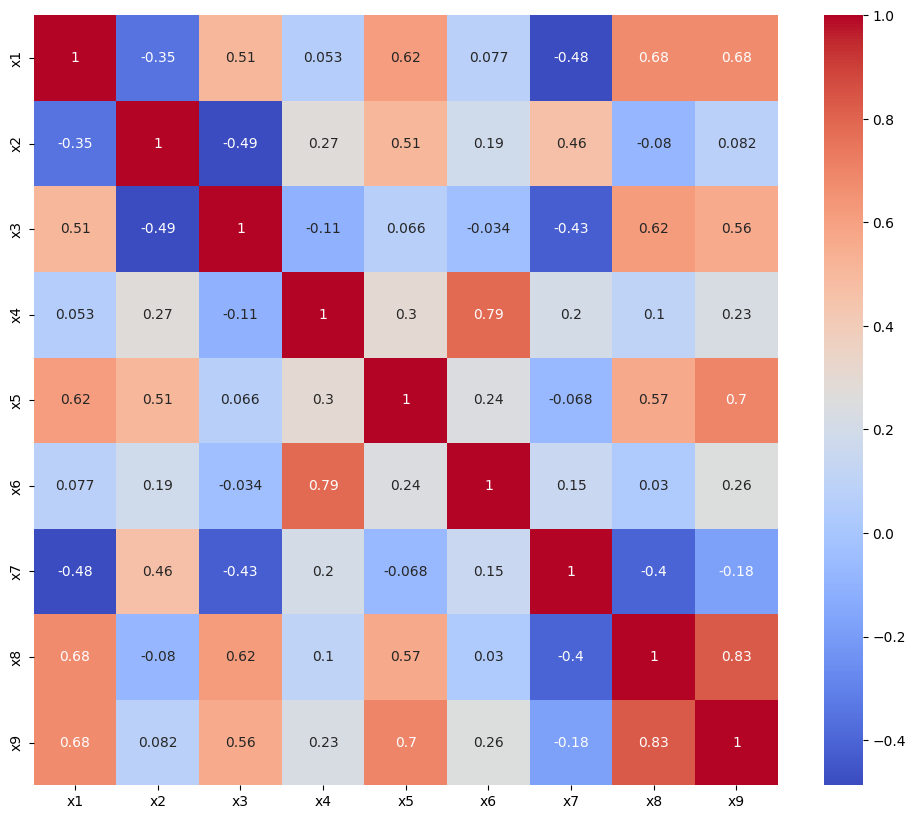

In [15]:
# Visualizar a correlação entre as variáveis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



In [18]:
# Definir a variável dependente e as variáveis independentes
y = df['x9']
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]



In [19]:
# Método Stepwise para seleção de variáveis
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out=0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('Variáveis Selecionadas pelo Método Stepwise:')
print(result)



Add  x8                             with p-value 2.04949e-26
Add  x5                             with p-value 1.47393e-07
Add  x3                             with p-value 2.25328e-05
Add  x7                             with p-value 0.000770888
Add  x6                             with p-value 0.00205217
Variáveis Selecionadas pelo Método Stepwise:
['x8', 'x5', 'x3', 'x7', 'x6']


In [20]:
# Ajustar o modelo de regressão linear com as variáveis selecionadas
X_selected = sm.add_constant(df[result])
model_stepwise = sm.OLS(y, X_selected).fit()

# Resumo do modelo stepwise
print(model_stepwise.summary())



                            OLS Regression Results                            
Dep. Variable:                     x9   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           2.69e-36
Time:                        11:01:21   Log-Likelihood:                -268.24
No. Observations:                 100   AIC:                             548.5
Df Residuals:                      94   BIC:                             564.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5054      3.998     -0.877      0.3

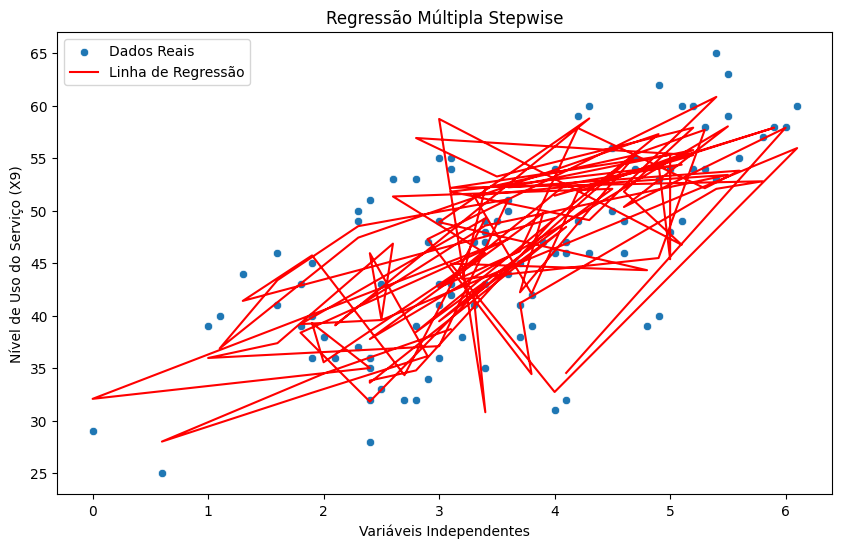

In [23]:
# Visualização dos dados e da linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['x1'], y=df['x9'], label='Dados Reais')
plt.plot(df['x1'], model_stepwise.predict(X_selected), color='red', label='Linha de Regressão')
plt.xlabel('Variáveis Independentes')
plt.ylabel('Nível de Uso do Serviço (X9)')
plt.title('Regressão Múltipla Stepwise')
plt.legend()
plt.show()

## `Análise e Conclusão`

### `Estatísticas Descritivas`
As estatísticas descritivas fornecem uma visão geral dos dados, incluindo a média, desvio padrão, valores mínimos e máximos, e quartis. Isso nos ajuda a entender a distribuição dos dados das variáveis envolvidas.

### `Matriz de Correlação`

A matriz de correlação mostra a relação entre as variáveis X9 (nível de uso do serviço) e as variáveis independentes X1 a X8. Valores próximos de 1 ou -1 indicam uma forte correlação positiva ou negativa, respectivamente.

### `Modelo de Regressão Múltipla Stepwise``

O método stepwise seleciona as variáveis independentes que têm uma contribuição significativa para o modelo de regressão. O modelo ajustado é exibido com um resumo que inclui coeficientes, erro padrão, valores t, p-valores, R-quadrado, e R-quadrado ajustado.

### `Visualização``

A visualização mostra a relação entre uma das variáveis independentes e a variável dependente X9, juntamente com a linha de regressão ajustada, permitindo uma análise visual da correlação e da regressão.

### `Conclusão``

Os resultados indicam quais variáveis independentes têm uma contribuição significativa para prever o nível de uso do serviço (X9). O modelo de regressão múltipla stepwise fornece uma forma de prever X9 com base nas variáveis selecionadas. A visualização confirma que a linha de regressão ajustada se alinha bem com os dados reais, indicando uma boa adequação do modelo.


